In [1]:
import time
import numpy as np
import xgboost as xgb
from wideboost.wrappers import wxgb

import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=False,
    as_supervised=True,
    with_info=True,
)

for i in ds_train.batch(60000):
    a = i
    
for i in ds_test.batch(60000):
    b = i

In [2]:
xtrain = a[0].numpy().reshape([-1,28*28])
ytrain = a[1].numpy()

xtest = b[0].numpy().reshape([-1,28*28])
ytest = b[1].numpy()

dtrain = xgb.DMatrix(xtrain,label=ytrain)
dtest = xgb.DMatrix(xtest,label=ytest)

In [10]:
%%time
param = {'max_depth':2, 'eta':0.2, 'objective':'multi:softmax','eval_metric':['merror'], 'num_class':10 }
num_round = 50
watchlist = [(dtrain,'train'),(dtest,'test')]
xgb_results = dict()
bst = xgb.train(param, dtrain, num_round,watchlist,evals_result=xgb_results)

[0]	train-merror:0.32323	test-merror:0.33590
[1]	train-merror:0.28477	test-merror:0.29500
[2]	train-merror:0.27015	test-merror:0.27990
[3]	train-merror:0.25373	test-merror:0.26460
[4]	train-merror:0.24905	test-merror:0.25660
[5]	train-merror:0.24007	test-merror:0.25060
[6]	train-merror:0.23120	test-merror:0.24370
[7]	train-merror:0.22640	test-merror:0.23680
[8]	train-merror:0.22233	test-merror:0.23230
[9]	train-merror:0.21737	test-merror:0.22820
[10]	train-merror:0.21378	test-merror:0.22440
[11]	train-merror:0.20992	test-merror:0.22060
[12]	train-merror:0.20602	test-merror:0.21690
[13]	train-merror:0.20377	test-merror:0.21420
[14]	train-merror:0.20165	test-merror:0.21350
[15]	train-merror:0.19982	test-merror:0.21150
[16]	train-merror:0.19720	test-merror:0.20900
[17]	train-merror:0.19508	test-merror:0.20710
[18]	train-merror:0.19347	test-merror:0.20460
[19]	train-merror:0.19183	test-merror:0.20410
[20]	train-merror:0.19017	test-merror:0.20170
[21]	train-merror:0.18810	test-merror:0.1994

In [4]:
%%time
from wideboost.helpers import onehot
# wideboost uses the hessian for multi:softmax rather than 2 times the hessian as used in xgboost.
# On Fashion MNIST at least, the hessian tends to perform better. xgb uses eta = 0.2 as a better comparison.
param['eta'] = 0.1

# 'btype' = 'I', 'beta_eta' = 0 and 'extra_dims' = 0 is equivalent to boosting
param['extra_dims'] = 0
param['btype'] = 'I'   
param['beta_eta'] = 0

# 'num_class' is replaced by 'output_dim'
param['num_class'] = None
param['output_dim'] = 10

wxgb_results = dict()
watchlist = [((xtrain, onehot(ytrain)),'train'),((xtest, onehot(ytest)),'test')]
wbst = wxgb.fit(
    xtrain, onehot(ytrain),
    param, num_round, watchlist,evals_result=wxgb_results
)

[0]	train-merror:0.32323	test-merror:0.33590
[1]	train-merror:0.28490	test-merror:0.29500
[2]	train-merror:0.27015	test-merror:0.27990
[3]	train-merror:0.25373	test-merror:0.26470
[4]	train-merror:0.24900	test-merror:0.25650
[5]	train-merror:0.24010	test-merror:0.25050
[6]	train-merror:0.23125	test-merror:0.24370
[7]	train-merror:0.22640	test-merror:0.23670
[8]	train-merror:0.22237	test-merror:0.23230
[9]	train-merror:0.21737	test-merror:0.22820
[10]	train-merror:0.21365	test-merror:0.22400
[11]	train-merror:0.20992	test-merror:0.22120
[12]	train-merror:0.20630	test-merror:0.21710
[13]	train-merror:0.20417	test-merror:0.21470
[14]	train-merror:0.20218	test-merror:0.21240
[15]	train-merror:0.19958	test-merror:0.21100
[16]	train-merror:0.19743	test-merror:0.20880
[17]	train-merror:0.19578	test-merror:0.20680
[18]	train-merror:0.19385	test-merror:0.20500
[19]	train-merror:0.19147	test-merror:0.20380
[20]	train-merror:0.19002	test-merror:0.20190
[21]	train-merror:0.18797	test-merror:0.1999

In [5]:
%%time
# Adding more dimensions fits more trees per round but also decreases loss with fewer boost rounds
param['extra_dims'] = 10
wxgb10_results = dict()
wbst = wxgb.fit(
    xtrain, onehot(ytrain),
    param, num_round, watchlist, evals_result=wxgb10_results
)

[0]	train-merror:0.29837	test-merror:0.30780
[1]	train-merror:0.26010	test-merror:0.27030
[2]	train-merror:0.23873	test-merror:0.24940
[3]	train-merror:0.22453	test-merror:0.23530
[4]	train-merror:0.21422	test-merror:0.22570
[5]	train-merror:0.20788	test-merror:0.21840
[6]	train-merror:0.19997	test-merror:0.21070
[7]	train-merror:0.19425	test-merror:0.20500
[8]	train-merror:0.18903	test-merror:0.20050
[9]	train-merror:0.18458	test-merror:0.19540
[10]	train-merror:0.17950	test-merror:0.19290
[11]	train-merror:0.17558	test-merror:0.18900
[12]	train-merror:0.17268	test-merror:0.18570
[13]	train-merror:0.16873	test-merror:0.18200
[14]	train-merror:0.16555	test-merror:0.17890
[15]	train-merror:0.16292	test-merror:0.17590
[16]	train-merror:0.16057	test-merror:0.17340
[17]	train-merror:0.15758	test-merror:0.17050
[18]	train-merror:0.15610	test-merror:0.16950
[19]	train-merror:0.15358	test-merror:0.16740
[20]	train-merror:0.15093	test-merror:0.16670
[21]	train-merror:0.14913	test-merror:0.1651

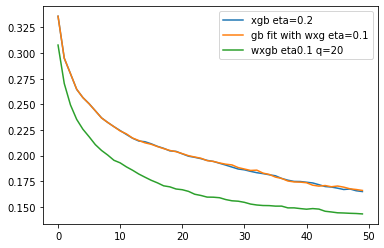

In [9]:
plt.plot(xgb_results['test']['merror'], label='xgb eta=0.2')
plt.plot(wxgb_results['test']['merror'], label='gb fit with wxg eta=0.1')
plt.plot(wxgb10_results['test']['merror'], label='wxgb eta0.1 q=20')
plt.legend()
plt.show()